# New York 311 calls analysed
## Improve Housing Preservation Department

### What Is the Top Complaint Type?
First we have to see which one is the most refered complaint

### Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

The process will be:
1. Determine which is the most frequent complaint
2. 

In [1]:
import pandas as pd
%matplotlib inline

#df_311 = pd.read_csv('https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status')

# to prevent downloading the file frequently I saved it to my local disk
df_311 = pd.read_csv('nyc311.csv')
df_311.head()

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
0,ADDRESS,BRONX,BRONX,2018-04-24T14:15:01.000,GENERAL,2017-12-12T10:05:40.000,383 EAST 162 STREET,10451.0,40.824952,RESIDENTIAL BUILDING,-73.913944,The Department of Housing Preservation and Dev...,Closed,EAST 162 STREET,37914383
1,ADDRESS,BRONX,BRONX,2018-04-24T14:15:02.000,GENERAL,2018-01-08T12:47:29.000,383 EAST 162 STREET,10451.0,40.824952,RESIDENTIAL BUILDING,-73.913944,The Department of Housing Preservation and Dev...,Closed,EAST 162 STREET,38152033
2,ADDRESS,QUEENS,Woodside,2018-04-24T21:29:42.000,PAINT/PLASTER,2018-01-08T22:33:51.000,60-10 47 AVENUE,11377.0,40.739912,RESIDENTIAL BUILDING,-73.904328,The Department of Housing Preservation and Dev...,Closed,47 AVENUE,38157143
3,ADDRESS,QUEENS,Astoria,2018-04-24T09:50:17.000,APPLIANCE,2018-01-12T17:09:03.000,34-15 31 STREET,11106.0,40.759282,RESIDENTIAL BUILDING,-73.927550,The Department of Housing Preservation and Dev...,Closed,31 STREET,38205215
4,ADDRESS,QUEENS,Astoria,2018-04-24T09:50:18.000,DOOR/WINDOW,2018-01-22T14:04:15.000,30-34 32 STREET,11102.0,40.765523,RESIDENTIAL BUILDING,-73.921410,The Department of Housing Preservation and Dev...,Closed,32 STREET,38275095


### We first count the types of complaint, assuming the most frequent is the more important

Ordering the results makes it easier to read

In [2]:
complaint_types = pd.value_counts(df_311['complaint_type'].values, sort=True)
complaint_types

HEAT/HOT WATER            1116635
HEATING                    887869
PLUMBING                   685823
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       406771
PAINT - PLASTER            361258
PAINT/PLASTER              323708
ELECTRIC                   294900
NONCONST                   260890
DOOR/WINDOW                188288
WATER LEAK                 175731
GENERAL                    137373
FLOORING/STAIRS            127912
APPLIANCE                  104736
HPD Literature Request      53285
SAFETY                      46422
OUTSIDE BUILDING             6722
ELEVATOR                     5875
CONSTRUCTION                 5078
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                8
dtype: int64

### To make it even more intuitive, we plot it

It is pretty clear !!

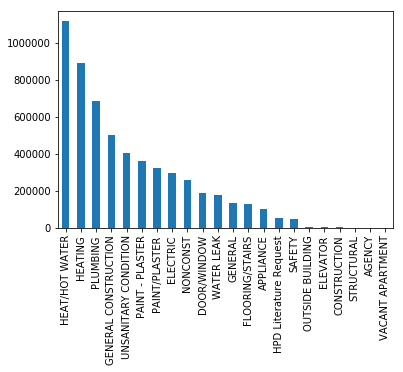

In [3]:
import matplotlib.pyplot as plt
complaint_types.plot.bar()

### We have an answer
**HEAT/HOT WATER** is the most prominent complaint. And it is followed by Heating that maybe it has something to do with it

## Focusing in **HEAT/HOT WATER**

Narrowing now the question to the main complaint we look for location of the incidents

In [4]:
df_311_area = df_311[['borough', 'incident_zip', 'street_name', 'latitude', 'longitude', 'status']].loc[df_311['complaint_type'] == 'HEAT/HOT WATER']
df_311_area.head()

,borough,incident_zip,street_name,latitude,longitude,status
374,QUEENS,11104.0,LOCUST STREET,40.748891,-73.919459,Closed
393,QUEENS,11377.0,69 STREET,40.737503,-73.895946,Closed
396,QUEENS,11378.0,GRAND AVENUE,40.723810,-73.899333,Closed
404,BRONX,10467.0,WARING AVENUE,40.861366,-73.868229,Closed
409,QUEENS,11435.0,106 AVENUE,40.692414,-73.806067,Closed


### Let's list the null values

Let's see how many null values we have in the dataframe, and then eliminate them

In [5]:
df_311_area[df_311_area.isnull().any(axis=1)].count()

borough         7047
incident_zip       0
street_name     7047
latitude           1
longitude          1
status          7047
dtype: int64

In [6]:
df_311_area.dropna(inplace= True)

### group and count all

We are going to group and count by *borough, zip* and *street* then order by the count of different incidents and voilà we have the most critical streets. If we want to go street by street this might be the solution, but if we want to focus on zip codes or boroughs we need a less detailed list

It is pretty clear that there are streets in three boroughs with incidents, Bronxs is the most prominent. Maybe it also has to do with the lenght of the street. For example Broadway has 15434 incidents, but it is pretty long.

In [7]:
results1 = df_311[['borough', 
                       'incident_zip', 
                       'street_name', 
                       'unique_key']].groupby(['borough',
                                           'incident_zip', 
                                           'street_name']).agg(['count'])

results1.columns = results1.columns.get_level_values(0)

results1.sort_values(by=['unique_key'], ascending=False).head(20)

unique_key
borough   incident_zip street_name                 
BROOKLYN  11230.0      OCEAN AVENUE           18476
          11226.0      LINDEN BOULEVARD       18198
BRONX     10472.0      BOYNTON AVENUE         16878
MANHATTAN 10031.0      BROADWAY               15434
          10040.0      ARDEN STREET           15069
BROOKLYN  11226.0      OCEAN AVENUE           14798
BRONX     10451.0      GRAND CONCOURSE        13390
          10468.0      MORRIS AVENUE          12973
BROOKLYN  11212.0      ROCKAWAY PARKWAY       12690
BRONX     10468.0      GRAND CONCOURSE        12469
QUEENS    11373.0      ELMHURST AVENUE        12439
BRONX     10458.0      VALENTINE AVENUE       12412
          10453.0      DAVIDSON AVENUE        12279
          10452.0      GRAND CONCOURSE        11954
          10453.0      WALTON AVENUE          11938
          10456.0      SHERIDAN AVENUE        11907
          10458.0      GRAND CONCOURSE        11349
          10467.0      DECATUR AVENUE         11302
          10463.0      BAILEY AVENUE          11268
          10468.0      CRESTON AVENUE         10772

### group and count just borough and zip code

We are going to group and count by *borough, zip* then order by the count of different incidents just to avoid the details of the streets

In [8]:
results2 = df_311[['borough', 
                       'incident_zip', 
                       'unique_key']].groupby(['borough',
                                           'incident_zip']).agg(['count'])

results2.columns = results2.columns.get_level_values(0)

results2.sort_values(by=['unique_key'], ascending=False).head(10)

unique_key
borough   incident_zip            
BROOKLYN  11226.0           172197
BRONX     10467.0           140831
          10458.0           137696
          10453.0           130783
          10468.0           118377
          10452.0           118258
          10457.0           114950
          10456.0           106858
MANHATTAN 10031.0           100193
BROOKLYN  11225.0            97846

### finally a simple count and a chart

By boroughs Bronx and Brooklyn are the worst, but we saw that there are areas in Bronx concentrating the incidents.

In [9]:
data = pd.value_counts(df_311_area['borough'].values, sort=True)

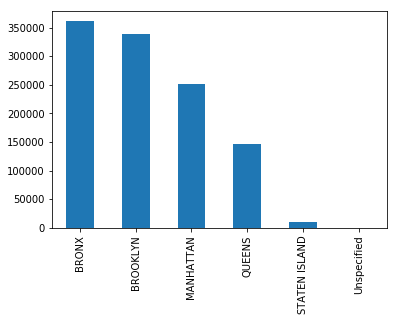

In [10]:
import matplotlib.pyplot as plt
data.plot.bar()

#### Install required packages if needed

````

!pip install Folium


````

In [11]:
import folium

### Let's map it first

#### Focus and center the map

First we calculate the center (average) of the locations

In [12]:
la_mean = df_311_area['latitude'].mean()
lo_mean = df_311_area['longitude'].mean()

### Reduce the dataset for mapping

There are too many rows to paint, we will get only random 1500.

**In Chrome it does not render properly if the number of marks is too large (!!!!) so y donwsized it to 1500 marks which is not that many but still it shows pretty well the problem.**

In [13]:
df_311_plot = df_311_area.sample (n=1500, random_state=42)

In [14]:
import folium.plugins

# define NY map
ny_map = folium.Map(location=[la_mean, lo_mean], zoom_start=11, tiles='Stamen Toner')

# instantiate a mark cluster object for the incidents in the dataframe
incidents = folium.plugins.MarkerCluster().add_to(ny_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_311_plot.latitude, df_311_plot.longitude, df_311_plot.street_name):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
ny_map

## What Is the Relationship between Housing Characteristics and Complaints?
The goal of this exercise is to find the answer to the Question 3 of the problem statement: 

## To be more specific, what about **Heat/Hot Water**? Are there characteristics that are predictive

There is a web site from NYC, PLUTO, that has detailed information of land use and geographic data at the tax lot level. It is available here:

https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v1.zip

### Focus on Bronx

As Bronx is the worst area (for this matter) we will only focus in this Borough

### Read Bronx file

In [15]:
# This file has too many columns to analyse so we are only getting few of them
cols_to_read = [  'Address',
                  'BldgArea',
                  'BldgDepth',
                  'BuiltFAR',
                  'CommFAR',
                  'FacilFAR',
                  'Lot', 
                  'LotArea',
                  'LotDepth',
                  'NumBldgs',
                  'NumFloors',
                  'OfficeArea',
                  'ResArea',
                  'ResidFAR',
                  'RetailArea',
                  'YearBuilt',
                  'YearAlter1',
                  'ZipCode',
                  'YCoord',
                  'XCoord']
bronx = pd.read_csv("bronx.csv", usecols=cols_to_read)
bronx.head()

,Lot,ZipCode,Address,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord
0,1,10454.0,122 BRUCKNER BOULEVARD,15000,0,0,0,0,1,0.0,200.0,0.0,0,0,0.00,6.02,5.0,6.5,1005957.0,232162.0
1,4,10454.0,126 BRUCKNER BOULEVARD,13770,752,0,272,0,2,1.0,100.0,16.0,1931,1994,0.05,6.02,5.0,6.5,1006076.0,232156.0
2,10,10454.0,138 BRUCKNER BOULEVARD,35000,39375,0,0,0,1,2.0,200.0,200.0,1931,0,1.13,6.02,5.0,6.5,1006187.0,232036.0
3,17,10454.0,144 BRUCKNER BOULEVARD,2500,12500,12500,0,0,1,5.0,100.0,85.0,1931,2001,5.00,6.02,5.0,6.5,1006299.0,232033.0
4,18,10454.0,148 BRUCKNER BOULEVARD,1875,8595,6876,0,1719,1,5.0,75.0,70.0,1920,2009,4.58,6.02,5.0,6.5,1006363.0,232040.0


### We create a subset pandas dataframe

With only the values to study, namely borough, address and location. After that we make and encoding setting BRONX as 1 and all others as 0

In [16]:
df_bronx_incidents = df_311[['complaint_type', 'incident_address', 'latitude', 'longitude', 'unique_key']].loc[df_311['borough'] == 'BRONX']
print('Number of Bronx incidents',df_bronx_incidents['unique_key'].count(),sep=' ')
df_bronx_incidents.head()

Number of Bronx incidents 1508988


,complaint_type,incident_address,latitude,longitude,unique_key
0,GENERAL,383 EAST 162 STREET,40.824952,-73.913944,37914383
1,GENERAL,383 EAST 162 STREET,40.824952,-73.913944,38152033
6,PAINT/PLASTER,2647 SEDGWICK AVENUE,40.869502,-73.904438,38278432
9,WATER LEAK,2647 SEDGWICK AVENUE,40.869502,-73.904438,38279902
10,WATER LEAK,2647 SEDGWICK AVENUE,40.869502,-73.904438,38281075


In [17]:
df_bronx_incidents['complaint_type'] = (df_bronx_incidents['complaint_type'] == 'HEAT/HOT WATER').astype(int)

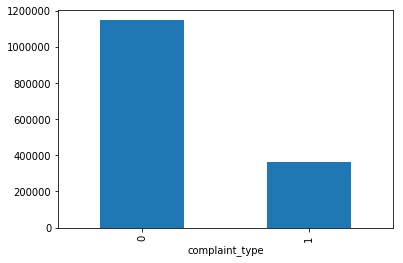

In [18]:
import matplotlib.pyplot as plt
df_bronx_incidents.groupby('complaint_type').agg('complaint_type').count().plot.bar()

In [19]:
df_bronx = pd.merge(df_bronx_incidents, bronx, how='left', left_on=['incident_address'], right_on=['Address'])

In [20]:
df_bronx.head()

,complaint_type,incident_address,latitude,longitude,unique_key,Lot,ZipCode,Address,LotArea,BldgArea,...,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord
0,0,383 EAST 162 STREET,40.824952,-73.913944,37914383,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,383 EAST 162 STREET,40.824952,-73.913944,38152033,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2647 SEDGWICK AVENUE,40.869502,-73.904438,38278432,100.0,10468.0,2647 SEDGWICK AVENUE,6003.0,27225.0,...,121.83,90.0,1924.0,0.0,4.54,2.43,0.0,4.8,1010691.0,256196.0
3,0,2647 SEDGWICK AVENUE,40.869502,-73.904438,38279902,100.0,10468.0,2647 SEDGWICK AVENUE,6003.0,27225.0,...,121.83,90.0,1924.0,0.0,4.54,2.43,0.0,4.8,1010691.0,256196.0
4,0,2647 SEDGWICK AVENUE,40.869502,-73.904438,38281075,100.0,10468.0,2647 SEDGWICK AVENUE,6003.0,27225.0,...,121.83,90.0,1924.0,0.0,4.54,2.43,0.0,4.8,1010691.0,256196.0


### There are incident streets not available in the pluto file, so we just drop them

This is a problem with cardinality.

In [21]:
df_bronx.dropna(inplace=True)

### Let's get rid of the addresses

Let's see how many null values we have in the dataframe, and then eliminate them. Also we can select Lot as the index

In [22]:
df_bronx.drop(['Address', 'incident_address'], axis=1, inplace=True)

### Eliminate duplicates

There are a lot of duplicates. We are cleaning them and it results in *_1,211,609_* rows

In [23]:
df_bronx.drop_duplicates(inplace=True)

In [24]:
print('Number of Bronx incidents with no duplicates',df_bronx['unique_key'].count(),sep=' ')

Number of Bronx incidents with no duplicates 1211609


### Let's define dependent and independent variables

In [25]:
import numpy as np

y = np.asarray(df_bronx['complaint_type'])
predictors = df_bronx.columns.difference(['complaint_type'])
X = df_bronx[predictors]
X.set_index('unique_key', inplace=True)

In [26]:
X.head(10)

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,...,ResArea,ResidFAR,RetailArea,XCoord,YCoord,YearAlter1,YearBuilt,ZipCode,latitude,longitude
unique_key,,,,,,,,,,,,,,,,,,,,,
38278432,27225.0,90.0,4.54,0.0,4.8,100.0,6003.0,121.83,1.0,5.0,...,25225.0,2.43,2000.0,1010691.0,256196.0,0.0,1924.0,10468.0,40.869502,-73.904438
38279902,27225.0,90.0,4.54,0.0,4.8,100.0,6003.0,121.83,1.0,5.0,...,25225.0,2.43,2000.0,1010691.0,256196.0,0.0,1924.0,10468.0,40.869502,-73.904438
38281075,27225.0,90.0,4.54,0.0,4.8,100.0,6003.0,121.83,1.0,5.0,...,25225.0,2.43,2000.0,1010691.0,256196.0,0.0,1924.0,10468.0,40.869502,-73.904438
38282465,27225.0,90.0,4.54,0.0,4.8,100.0,6003.0,121.83,1.0,5.0,...,25225.0,2.43,2000.0,1010691.0,256196.0,0.0,1924.0,10468.0,40.869502,-73.904438
38282492,27225.0,90.0,4.54,0.0,4.8,100.0,6003.0,121.83,1.0,5.0,...,25225.0,2.43,2000.0,1010691.0,256196.0,0.0,1924.0,10468.0,40.869502,-73.904438
38347558,27225.0,90.0,4.54,0.0,4.8,100.0,6003.0,121.83,1.0,5.0,...,25225.0,2.43,2000.0,1010691.0,256196.0,0.0,1924.0,10468.0,40.869502,-73.904438
38447425,54500.0,81.0,4.04,0.0,4.8,21.0,13500.0,90.00,1.0,5.0,...,50350.0,3.44,4150.0,1010610.0,235664.0,2011.0,1926.0,10455.0,40.813584,-73.905006
38461142,63836.0,113.0,5.31,0.0,6.5,40.0,12021.0,123.17,1.0,6.0,...,62586.0,6.02,0.0,1015466.0,257916.0,0.0,1927.0,10468.0,40.874261,-73.886703
38489815,8020.0,82.0,3.41,0.0,4.8,63.0,2353.0,94.62,1.0,4.0,...,5970.0,2.43,2050.0,1011014.0,236762.0,0.0,1910.0,10455.0,40.816478,-73.902954


### Normalize variables

It's good idea to normalize data

In [27]:
from sklearn import preprocessing
X_norm = preprocessing.StandardScaler().fit(X).transform(X)

### Let's calculate correlations

Pearson correlation. As we want to know the importance as predictor, the absolute value is the indicator of correlation (ignoring if it is possitive or negative

In [28]:
from scipy.stats import pearsonr

correlations = []

#Loop all the predictors

for variable in range(X_norm.shape[1]):
    
    corr, p_value = pearsonr(y, X_norm[:,variable])
    
    # we will add only those which p value is less than 0.05
    
    if p_value < 0.05:
        correlations.append([X.columns[variable],corr,p_value])
    
df_correlations = pd.DataFrame.from_records(correlations, columns=['predictor','Pearson correlation','p value'], index='predictor')


### Not very good

It does not seem to be very good predictors: The best is _Numfloors_ and then _LotDepth_, _BldgArea_ and _RestArea_

Another calculation we can do is _r <sup>2</sup>_ that meassures the explained variance

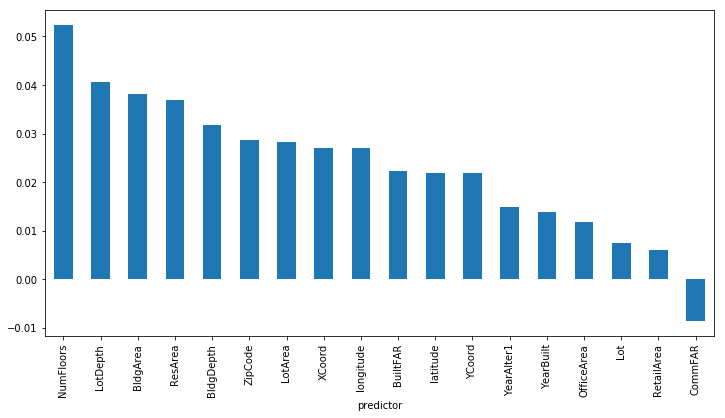

In [29]:
df_correlations.sort_values('Pearson correlation', ascending=False)['Pearson correlation'].plot.bar (figsize=(12, 6))

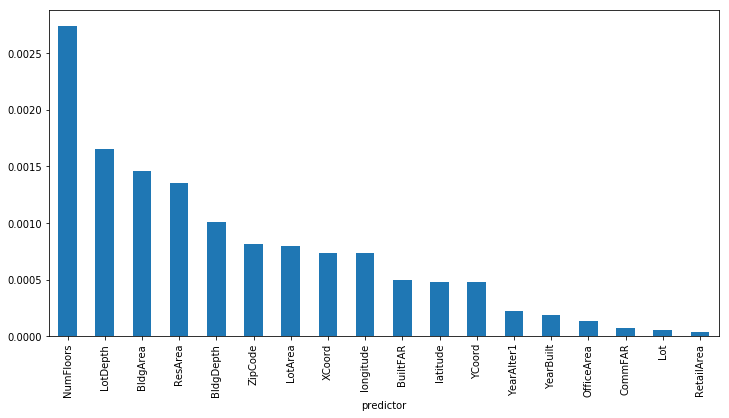

In [30]:
df_correlations['r squared'] = df_correlations['Pearson correlation']**2

df_correlations.sort_values('r squared', ascending=False)['r squared'].plot.bar (figsize=(12, 6))

### Resulting in these as best predictors:

1. NumFloors (+)
2. LotDepth (+)
3. BldgArea (+)
4. RestArea (+)

### Predicting the problem

Now let's train a XGB Classifier

In [31]:
X = df_bronx[predictors]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [35]:
X, y = make_classification()
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf.fit(X, y)






print(clf.feature_importances_)

[0.02368984 0.01166916 0.02469286 0.00837969 0.02045864 0.00544847
 0.02845638 0.04544746 0.08248357 0.00713402 0.0175517  0.00971621
 0.02566458 0.0269424  0.01845745 0.02038604 0.04008811 0.28583721
 0.27831836 0.01917785]


In [37]:
np.max(clf.feature_importances_)

0.28583721448269944

In [39]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 10,10

y_preds = model.predict_proba(X_test)

# take the second column because the classifier outputs scores for
# the 0 class as well
preds = y_preds[:,1]

# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

NameError: name 'model' is not defined